# Project 5

In [4]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# print seaborn version
print(sns.__version__)

0.13.2


In [5]:
df = pd.read_csv('web-page-phishing.csv')
df

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,n_space,n_tilde,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,n_redirection,phishing
0,37,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,126,4,1,2,0,1,3,0,2,0,0,0,0,0,0,0,0,0,1,1
3,18,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,55,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100072,23,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100073,34,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
100074,70,2,1,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
100075,28,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


0. url_length: The length of the URL.
1. n_dots: The count of ‘.’ characters in the URL.
2. n_hypens: The count of ‘-’ characters in the URL.
3. n_underline: The count of ‘_’ characters in the URL.
4. n_slash: The count of ‘/’ characters in the URL.
5. n_questionmark: The count of ‘?’ characters in the URL.
6. n_equal: The count of ‘=’ characters in the URL.
7. n_at: The count of ‘@’ characters in the URL.
7. n_and: The count of ‘&’ characters in the URL.
9. n_exclamation: The count of ‘!’ characters in the URL.n_space.
10. The count of ’ ’ characters in the URL.
11. n_tilde: The count of ‘~’ characters in the URL.
12. n_comma: The count of ‘,’ characters in the URL.
13. n_plus: The count of ‘+’ characters in the URL.
14. n_asterisk: The count of ‘*’ characters in the URL.
15. n_hastag: The count of ‘#’ characters in the URL.
16. n_dollar: The count of ‘$’ characters in the URL.
17. n_percent: The count of ‘%’ characters in the URL.
18. n_redirection: The count of redirections in the URL.
19. phishing: The Labels of the URL. 1 is phishing and 0 is legitimate.


In [6]:
# Assuming the last column is the target variable
X = df.iloc[:, :-1]  # Features (all columns except the last one)
y = df.iloc[:, -1]   # Target variable (last column)

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
# 
# # Create a Gaussian Naive Bayes classifier
# gnb = GaussianNB()
# 
# # Train the classifier on the training data
# gnb.fit(X_train, y_train)
# 
# # Make predictions on the testing data
# y_pred = gnb.predict(X_test)
# 
# # Evaluate the performance of the classifier
# accuracy = metrics.accuracy_score(y_test, y_pred)
# precision = metrics.precision_score(y_test, y_pred)
# recall = metrics.recall_score(y_test, y_pred)
# 
# print(f"Accuracy: {accuracy:.2f}")
# print(f"Precision: {precision:.2f}")
# print(f"Recall: {recall:.2f}")

In [100]:
def go(attributes, test_size=0.2):

    print(attributes.columns)

    # X = df.iloc[:, :-1]  # Features (all columns except the last one)
    X = attributes  # Features (all columns except the last one)
    y = df.iloc[:, -1]   # Target variable (last column)

    clf = GaussianNB()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size) # random_state=seed

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, y_pred, zero_division=1)

    # print(f"Precision: {precision}")
    # print(f"Recall: {recall}")
    # print(f"F1 Score: {fscore}")

    return precision, recall, fscore, y_test, y_pred
    # return precision, recall, y_test, y_pred

In [101]:
precision_a = []
precision_b = []

recall_a = []
recall_b = []

f1_a = []
f1_b = []

# y_test = []
# y_pred = []

for i in range(0, len(df.columns) - 1):
    precision_a.append([1] * (len(df.columns) - 1))
    precision_b.append([1] * (len(df.columns) - 1))
    
    recall_a.append([1] * (len(df.columns) - 1))
    recall_b.append([1] * (len(df.columns) - 1))
    
    f1_a.append([1] * (len(df.columns) - 1))
    f1_b.append([1] * (len(df.columns) - 1))
    
    # y_test.append([0] * (len(df.columns) - 1))
    # y_pred.append([0] * (len(df.columns) - 1))

for i in range(0, len(df.columns) - 1):
    
    for j in range(i + 1, len(df.columns) - 1):
        if i == j:
            continue
        print(f"Running on columns {i} and {j}")
        p, r, f, _, _ = go(df.iloc[:, [i, j]])
        # p, r, test, pred = go(df.iloc[:, [i, j]])
        # display(f"Test: {test}", f"Pred: {pred}")
    
        precision_a[i][j] = p[0]
        precision_a[j][i] = p[0]
        precision_b[i][j] = p[1]
        precision_b[j][i] = p[1]
        
        recall_a[i][j] = r[0]
        recall_a[j][i] = r[0]
        recall_b[i][j] = r[1]
        recall_b[j][i] = r[1]
        
        f1_a[i][j] = f[0]
        f1_a[j][i] = f[0]
        f1_b[i][j] = f[1]
        f1_b[j][i] = f[1]
        
        # y_test[i][j] = test
        # y_test[j][i] = test
        # y_pred[i][j] = pred
        # y_pred[j][i] = pred


Running on columns 0 and 1
Index(['url_length', 'n_dots'], dtype='object')
Running on columns 0 and 2
Index(['url_length', 'n_hypens'], dtype='object')
Running on columns 0 and 3
Index(['url_length', 'n_underline'], dtype='object')
Running on columns 0 and 4
Index(['url_length', 'n_slash'], dtype='object')
Running on columns 0 and 5
Index(['url_length', 'n_questionmark'], dtype='object')
Running on columns 0 and 6
Index(['url_length', 'n_equal'], dtype='object')
Running on columns 0 and 7
Index(['url_length', 'n_at'], dtype='object')
Running on columns 0 and 8
Index(['url_length', 'n_and'], dtype='object')
Running on columns 0 and 9
Index(['url_length', 'n_exclamation'], dtype='object')
Running on columns 0 and 10
Index(['url_length', 'n_space'], dtype='object')
Running on columns 0 and 11
Index(['url_length', 'n_tilde'], dtype='object')
Running on columns 0 and 12
Index(['url_length', 'n_comma'], dtype='object')
Running on columns 0 and 13
Index(['url_length', 'n_plus'], dtype='object

In [85]:
def heatmap(matrix, title):

    plt.figure(figsize=(16, 16))
    
    sns.heatmap(matrix, annot=True, fmt=".2f", cmap='Blues', cbar=True, xticklabels=df.columns[:-1], yticklabels=df.columns[:-1])
    plt.xticks(rotation=30)
    
    plt.title(title)
    plt.show()


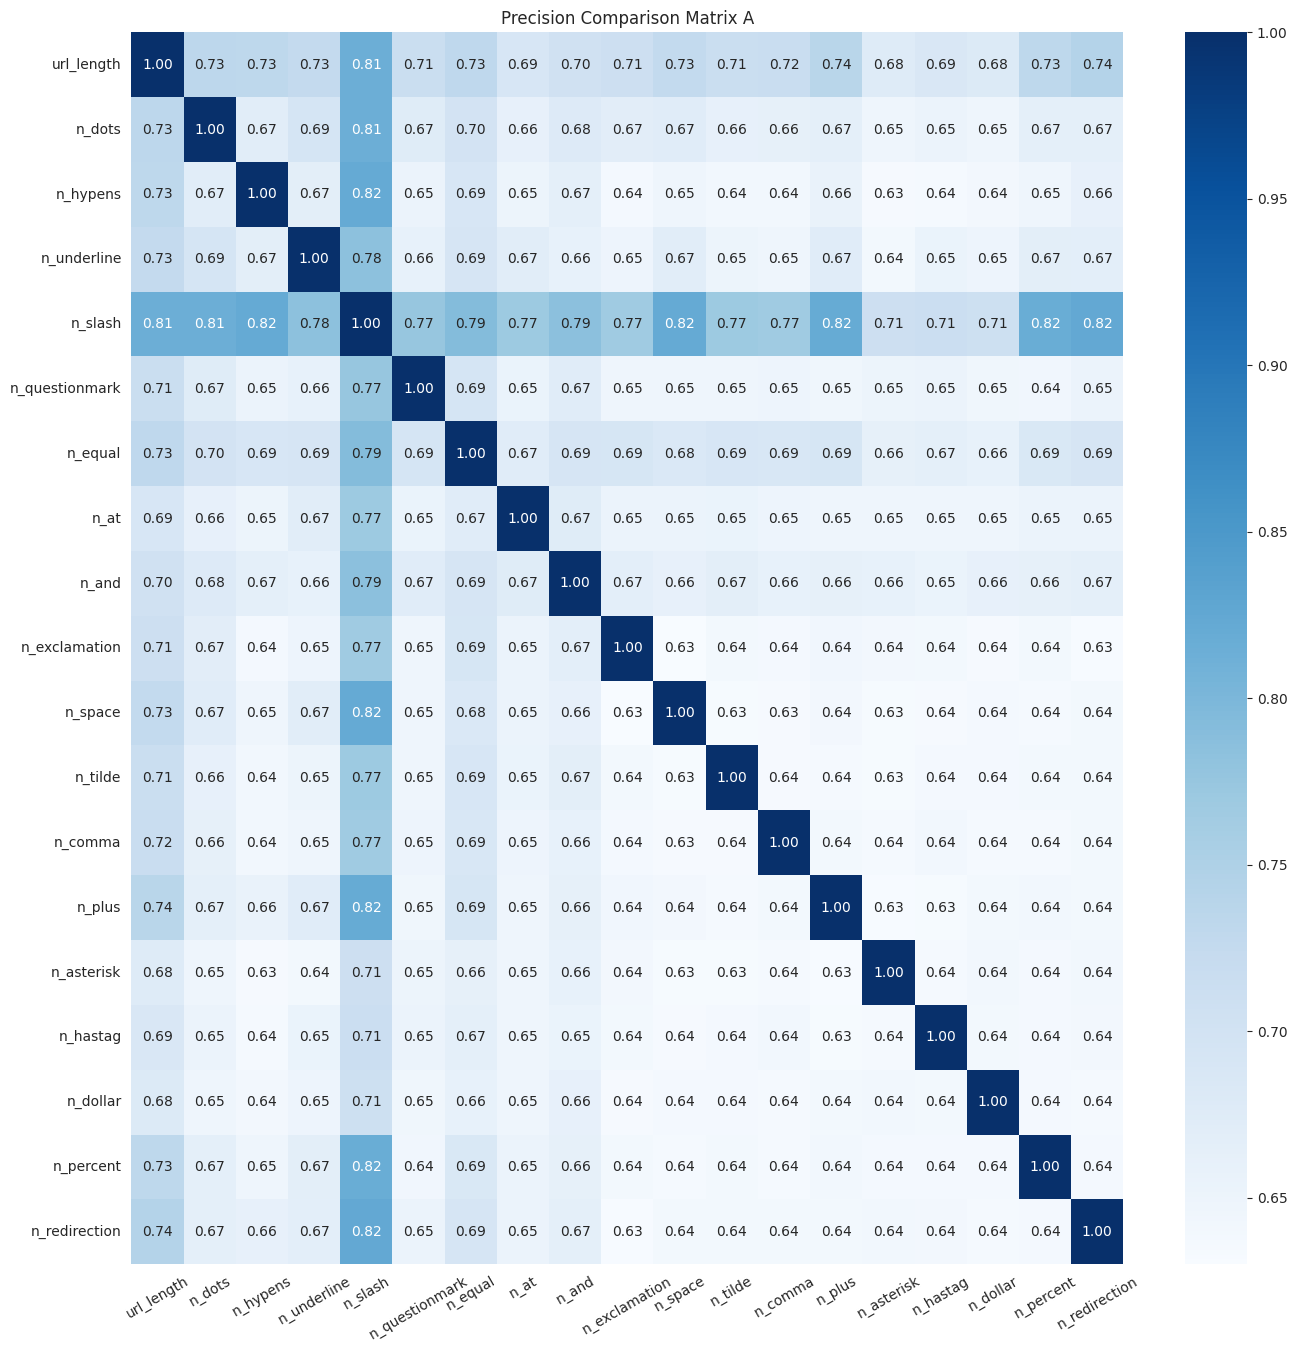

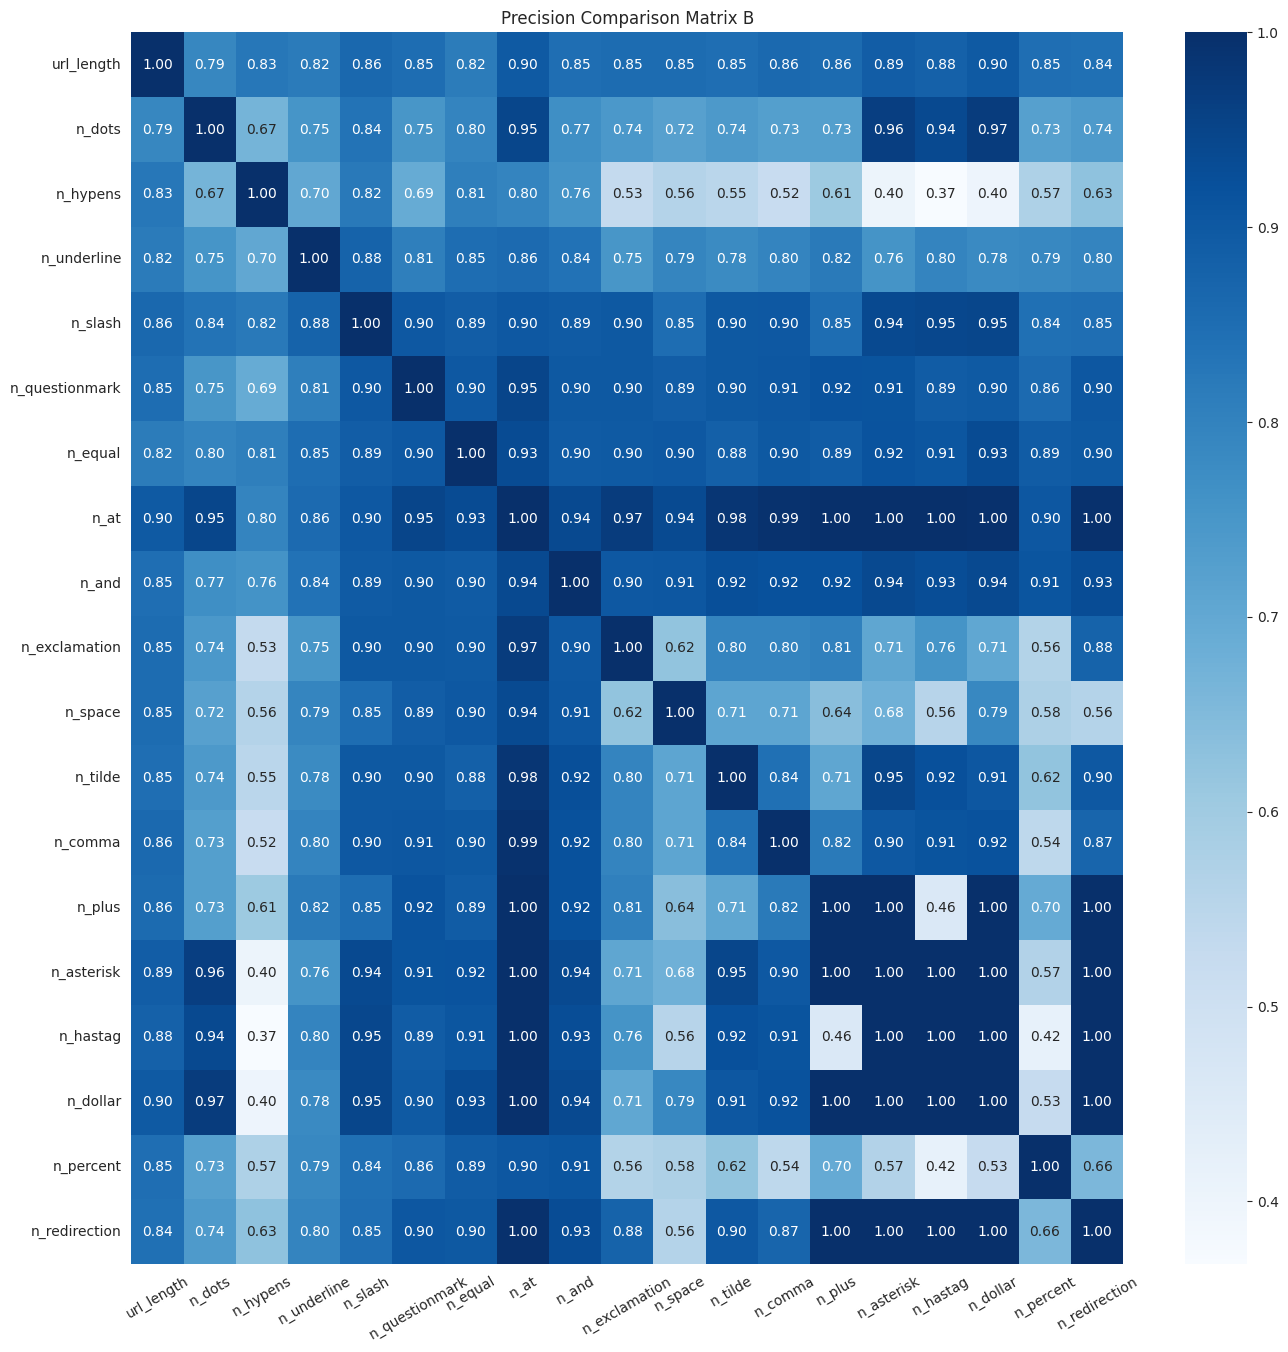

In [102]:
heatmap(precision_a, "Precision Comparison Matrix A")
heatmap(precision_b, "Precision Comparison Matrix B")

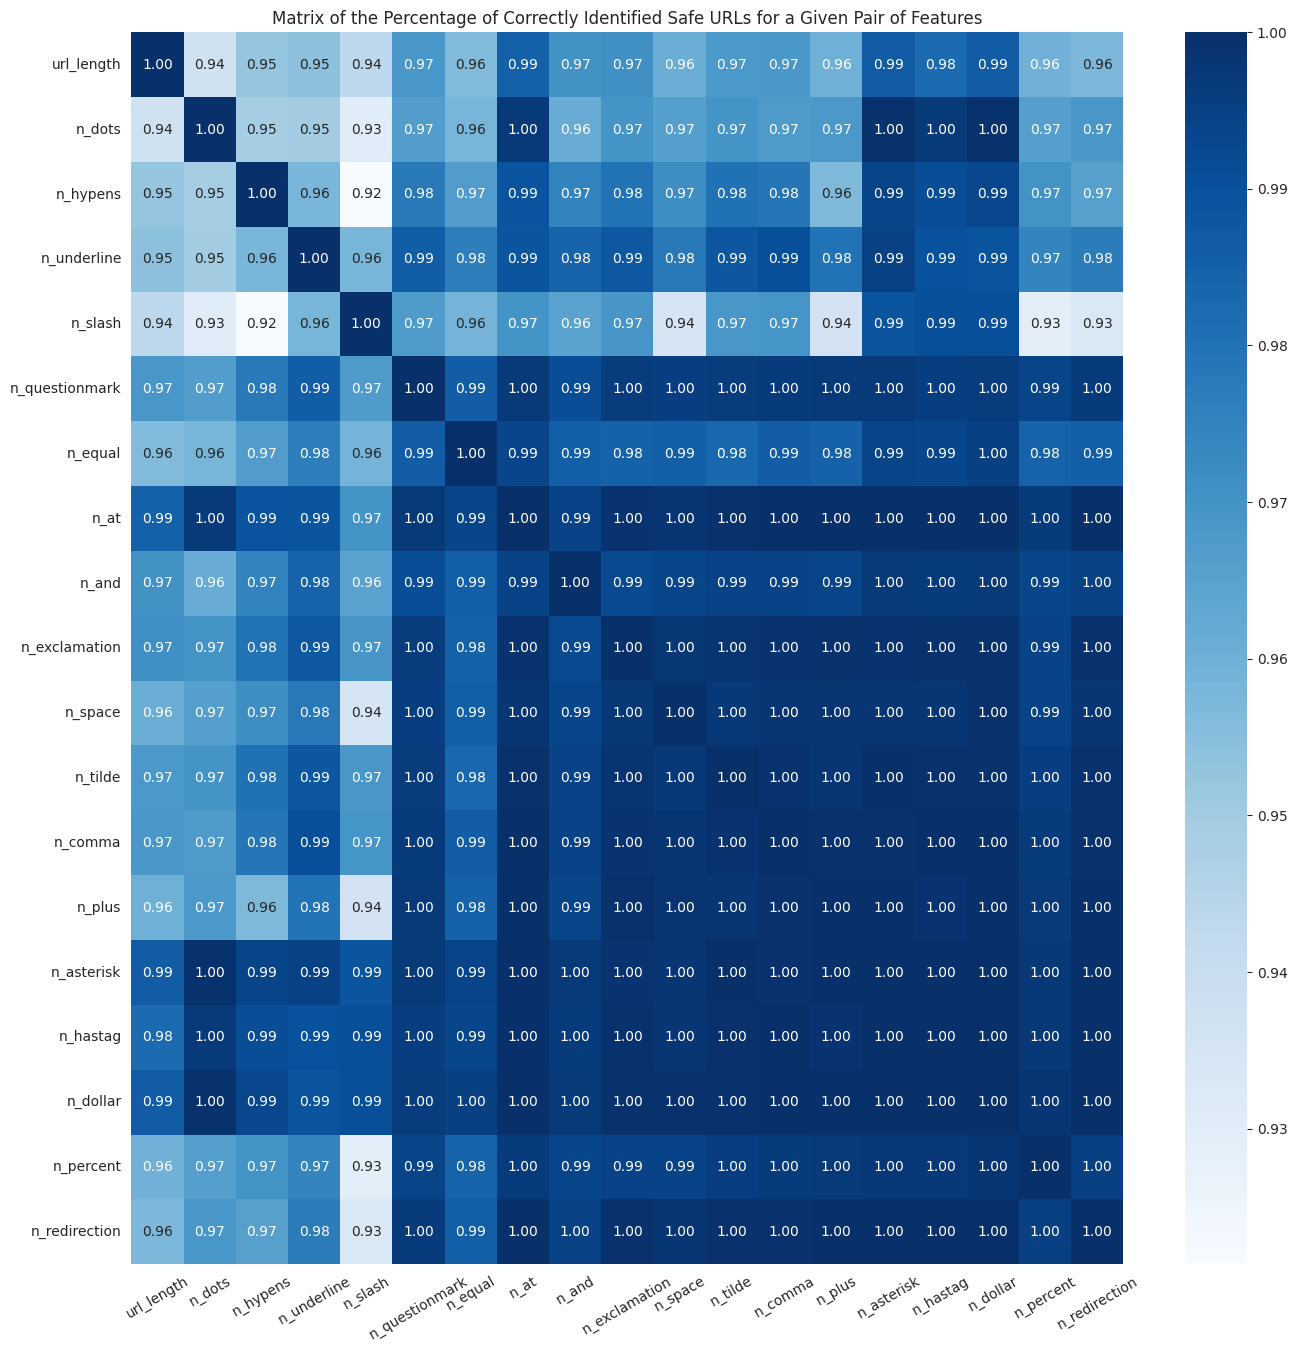

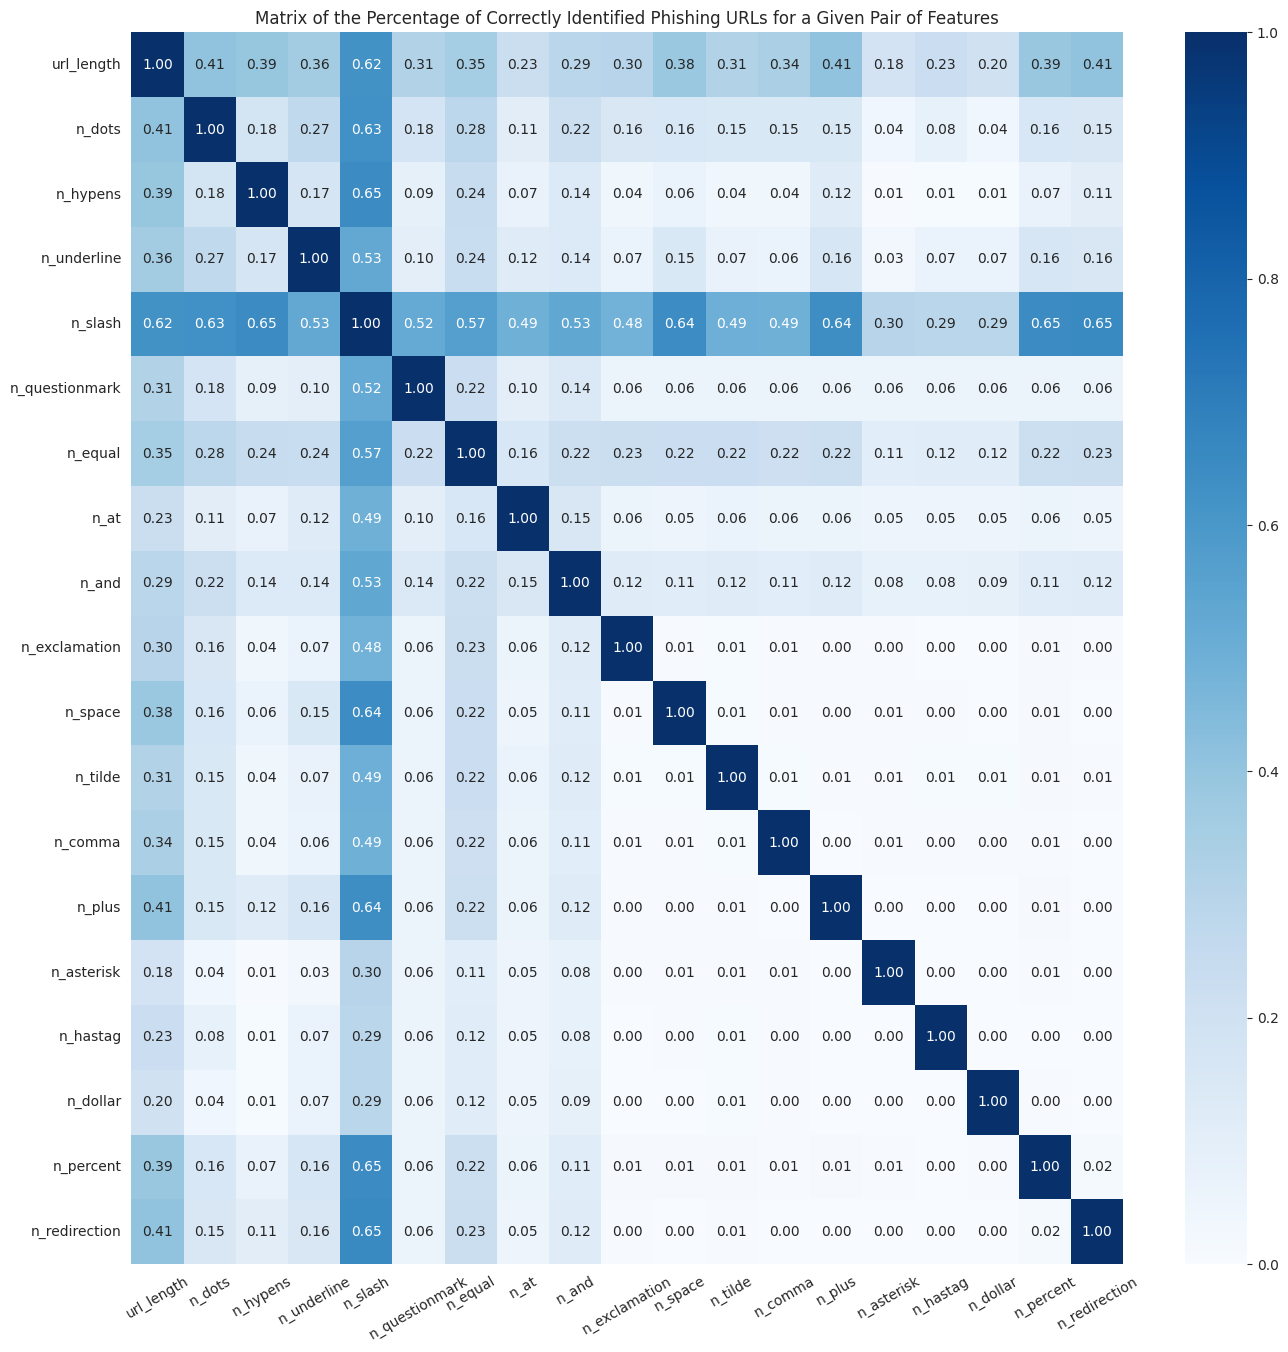

In [171]:
heatmap(recall_a, "Matrix of the Percentage of Correctly Identified Safe URLs for a Given Pair of Features")
# heatmap(recall_a, "Recall Comparison Matrix A")
heatmap(recall_b, "Matrix of the Percentage of Correctly Identified Phishing URLs for a Given Pair of Features")
# heatmap(recall_b, "Recall Comparison Matrix B")

# NOTE:
# recall_a = percent correct "okay" identifications
# recall_b = percent correct "phishing" identifications

In [147]:
# heatmap(f1_a, "F1 Score Comparison Matrix A")
# heatmap(f1_b, "F1 Score Comparison Matrix B")

In [168]:
def cf_matrix(title, y_test, y_pred):
    # print( f"Precision A: {precision_a[attr_a][attr_b]}")
    # matrix = [[precision_a[attr_a][attr_b], precision_b[attr_a][attr_b]],
    #           [recall_a[attr_a][attr_b], recall_b[attr_a][attr_b]]]
    
    matrix = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(matrix, annot=True, cmap="Blues", cbar=False, fmt="d",
                xticklabels=['Predicted Safe', 'Predicted Phishing'],
                yticklabels=['Actual Safe', 'Actual Phishing'])
    plt.title(title)
    # plt.xlabel("Predicted")
    # plt.ylabel("Actual")
    plt.show()

# sum of test and pred
# print(sum(y_test) / len(y_test))
# print(sum(y_pred) / len(y_pred))

Index(['n_slash', 'n_equal'], dtype='object')


'Precision'

array([0.80219278, 0.88685276])

'Recall'

array([0.95859003, 0.5786181 ])

'F1 Score'

array([0.87344561, 0.7003197 ])

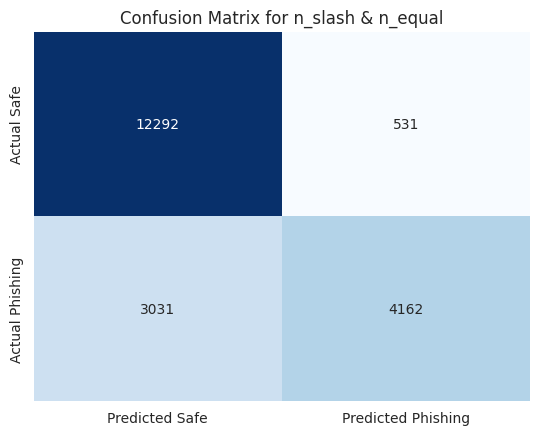

In [190]:
# display a confusion matrix at given indices

# col_a = 4 # n_slash
# col_b = 14 # n_asterisk
col_a = 4 # n_slash
col_b = 6 # n_equal

p, r, f, y_test, y_pred = go(df.iloc[:, [col_a,col_b]])
display('Precision', p)
display('Recall', r)
display('F1 Score', f)
# display('Test', y_test)
# display('Pred', y_pred)

cf_matrix(f"Confusion Matrix for {df.columns[col_a]} & {df.columns[col_b]}", y_test, y_pred)

In [161]:
# find the "best" columns for a given metric

def find_max(matrix):
    max_val = 0
    max_index = (0, 0)
    for i in range(0, len(matrix)):
        for j in range(0, len(matrix[i])):
            if matrix[i][j] > max_val and i != j:
                max_val = matrix[i][j]
                max_index = (i, j)
    # print(max_val, df.columns[max_index[0]], df.columns[max_index[1]])
    return max_val, max_index

best_correct_negatives_percent, best_correct_negatives_cols = find_max(recall_a)
best_correct_positives_percent, best_correct_positives_cols = find_max(recall_b)

print('Percentage of highest correct negatives and associated columns', best_correct_negatives_percent, df.columns[best_correct_negatives_cols[0]], f"(column {best_correct_negatives_cols[0]})", df.columns[best_correct_negatives_cols[1]], f"(column {best_correct_negatives_cols[1]})")
print('Percentage of highest correct positives and associated columns', best_correct_positives_percent, df.columns[best_correct_positives_cols[0]], f"(column {best_correct_positives_cols[0]})", df.columns[best_correct_positives_cols[1]], f"(column {best_correct_positives_cols[1]})")


# display(recall_a[best_correct_negatives_cols[0]][best_correct_negatives_cols[1]])
# display(recall_b[best_correct_positives_cols[0]][best_correct_positives_cols[1]])

# p, r, f, y_test, y_pred = go(df.iloc[:, [best_correct_negatives_cols[0],best_correct_negatives_cols[1]]])
# display('Precision', p)
# display('Recall', r)
# display('F1 Score', f)
# display('Test', y_test)
# display('Pred', y_pred)
# 
# cf_matrix("Confusion Matrix for Best Correct Negatives", y_test, y_pred)

# -----



# max_recall = 0
# max_recall_index = 0
# for i in range(0, len(recall_a)):
#     for j in range(0, len(recall_a[i])):
#         if recall_a[i][j] > max_recall and recall_a[i][j] != 1.0:
#             max_recall = recall_a[i][j]
#             max_recall_index = (i, j)
# 
# print(max_recall, df.columns[max_recall_index[0]], df.columns[max_recall_index[1]])

Percentage of highest correct negatives and associated columns 1.0 n_at (column 7) n_plus (column 13)
Percentage of highest correct positives and associated columns 0.652436513383665 n_slash (column 4) n_redirection (column 18)


In [134]:
def floor_below_threshold(value, threshold):
    if value < threshold:
        return 0
    return value

def floor_matrix(matrix, threshold):
    floored_matrix = []
    for i in range(0, len(matrix)):
        floored_matrix.append([floor_below_threshold(x, threshold) for x in matrix[i]])
    return floored_matrix

# floored_recall_a = floor_matrix(recall_a, 0.90)
# floored_recall_b = floor_matrix(recall_b, 0.5)

# heatmap(floored_recall_a, "Floored Recall Comparison Matrix A")
# heatmap(floored_recall_b, "Floored Recall Comparison Matrix B")

In [133]:
# find values that are not 0 in both matrices
def find_common(matrix_a, matrix_b):
    common = []
    for i in range(0, len(matrix_a)):
        for j in range(0, len(matrix_a[i])):
            if matrix_a[i][j] != 0 and matrix_b[i][j] != 0 and i != j:
                common.append((i, j))
    return common

# common = find_common(floored_recall_a, floored_recall_b)
# display(common)

In [135]:
# make a matrix at the common indices where present indices are 1 and absent indices are 0
def make_common_matrix(common, matrix_a, matrix_b):
    common_matrix = []
    for i in range(0, len(matrix_a)):
        common_matrix.append([0] * len(matrix_a))
    for i in range(0, len(common)):
        common_matrix[common[i][0]][common[i][1]] = 1
    return common_matrix

# common_matrix = make_common_matrix(common, floored_recall_a, floored_recall_b)
# heatmap(common_matrix, "Common Matrix")

In [144]:
def display_threshold(threshold_correct_negatives, threshold_correct_positives):

    floored_recall_a = floor_matrix(recall_a, threshold_correct_negatives)
    floored_recall_b = floor_matrix(recall_b, threshold_correct_positives)

    common = find_common(floored_recall_a, floored_recall_b)
    common_matrix = make_common_matrix(common, floored_recall_a, floored_recall_b)
    heatmap(common_matrix, f"Correct negative rate greater than {threshold_correct_negatives} and correct positive rate greater than {threshold_correct_positives} ")

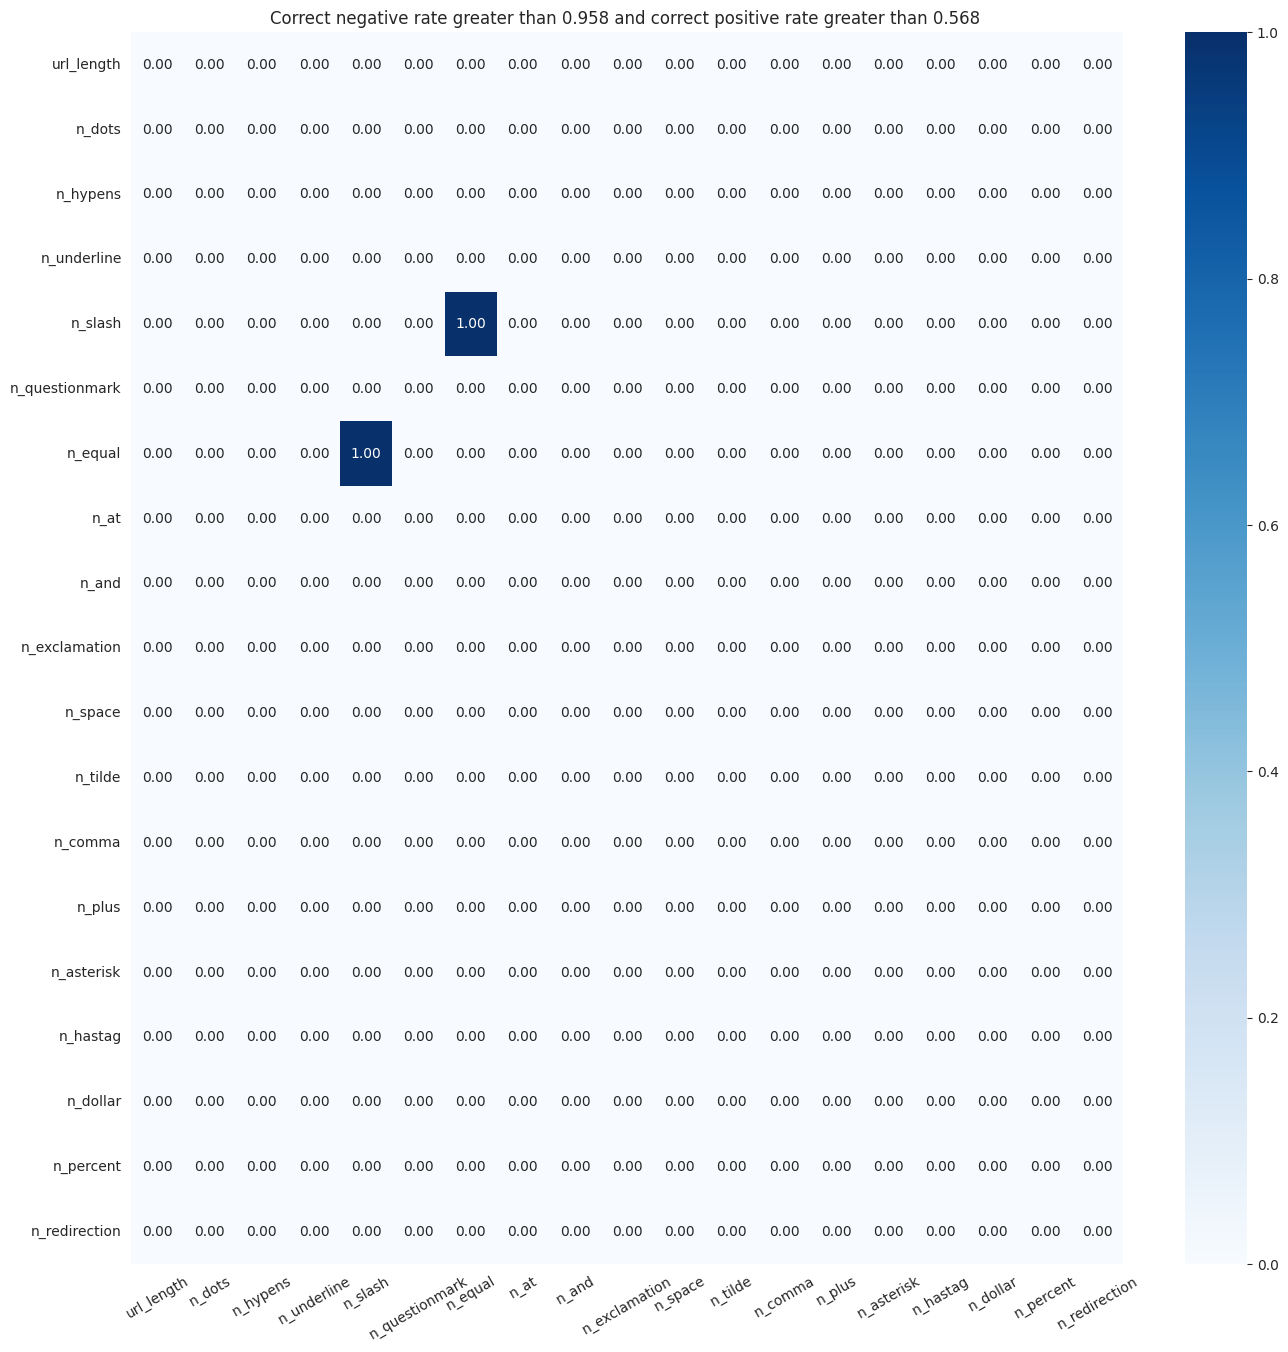

In [188]:
display_threshold(0.958, 0.568)